##                                                 Predicting Residential Real Estate Prices in King County, Washington

## Module 1: Data Acquisition

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
# load file and read
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Q.1 Display the data types of each column using the function dtypes.
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# use the method describe to obtain a statistical summary of the data
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Module 2: Data Wrangling

In [ ]:
# Q.2 Drop the columns "id" and "Unnamed: 0"
df = df.drop(['id', 'Unnamed: 0'], axis=1)

In [14]:
df.head(5) # to view the results

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
# check for missing values in 'bedrooms' and 'bathrooms'column
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [17]:
# replace missing values in column 'bedrooms'
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [18]:
# replace missing values in column 'bathrooms'
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [19]:
# verify that missing values have been replaced df['floors'].value_counts().to_frame()
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Module 3: Exploratory Data Analysis

In [129]:
#Q.3 Obtain the number of unique floor values and convert it to a data frame
result = df['floors'].value_counts().to_frame().reset_index() # the reset_index() method realigns the headers to be on the same row
result.columns = ['floors', 'count'] 
print(result)

   floors  count
0     1.0  10680
1     2.0   8241
2     1.5   1910
3     3.0    613
4     2.5    161
5     3.5      8


<Figure size 600x400 with 0 Axes>

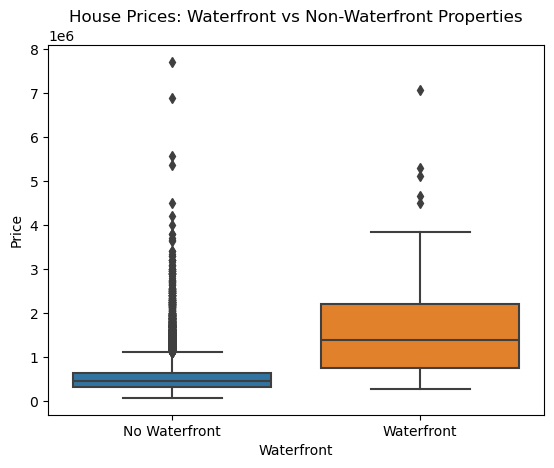

<Figure size 600x400 with 0 Axes>

In [130]:
# Q.4 Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers

sns.boxplot(x='waterfront', y='price', data=df)

# Customize the plot
plt.title('House Prices: Waterfront vs Non-Waterfront Properties')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.xticks([0, 1], ['No Waterfront', 'Waterfront'])
plt.figure(figsize=(6, 4))

Text(0, 0.5, 'Price')

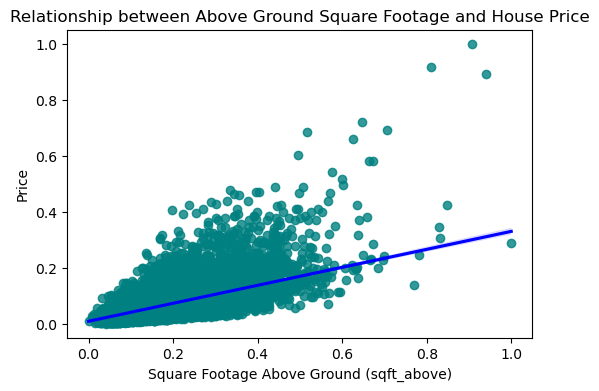

In [57]:
# Q.5 Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

# First we normalize the data in both columns to ensure that sqft_above do weight more heavily on the reults
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['sqft_above', 'price']] = scaler.fit_transform(df[['sqft_above', 'price']])

# Create the regression plot
plt.figure(figsize=(6, 4))
sns.regplot(x='sqft_above', y='price', data=df_normalized, color='green', scatter_kws={'color':'teal'}, line_kws={'color': 'blue'})

# customize the plot
plt.title('Relationship between Above Ground Square Footage and House Price')
plt.xlabel('Square Footage Above Ground (sqft_above)')
plt.ylabel('Price')

##  Module 4: Model development

In [136]:
# Q.6 Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2

# Define the feature and target variable
X = df[['sqft_living']]
Y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X,Y)

# Calculate the R^2 score
r_squared = lm.score(X, Y)

print(f"The coefficient of determination or R^2 is: {r2:.4f}") # .4f gives the number of deciml places


The coefficient of determination or R^2 is: 0.7513


In [88]:
# Q.7 Fit a linear regression model to predict the 'price' using the list of features:

# Define the list of features
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 

# Define the feature matrix X and target variable Y
X = df[features]
Y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X,Y)

# Calculate the R^2 score
r2 = lm.score(X, Y)
print(f"The coefficient of determination or R^2 is: {r2:.4f}") # .4f gives the number of deciml places

The coefficient of determination or R^2 is: 0.6577


In [115]:
# Q.8  Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

# Define the pipeline
pipeline = Pipeline([('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())
])

# Define the features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

# Fit the pipeline
pipeline.fit(X, Y)

# Predict and calculate R^2
Y_pred = pipeline.predict(X)
r2 = r2_score(Y, Y_pred)

print("R-squared score:", r2)


R-squared score: 0.7513404110730729


## Module 5: Model Evaluation and Refinement

In [116]:
# Q.9 Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Data patitioning into training and test data
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

In [101]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [114]:
from sklearn.linear_model import Ridge
# Create the ridge reg model
rigeModel = Ridge(alpha=0.1)

# Fitting the model
rigeModel.fit(x_train, y_train)

# Scoring the model
score = rigeModel.score(x_test, y_test)
print("R-squared score:", score)

R-squared score: 0.6478759163939113


In [123]:
# Q.10 

# Generating the 2nd order Polynomial feature
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

# Create ridge regression model and fitting
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)

# Model evaluation
score = RigeModel.score(x_test_pr, y_test)
print("R-squared score:", score)

R-squared score: 0.7002744268644931
